# Hacklytics 2021

All the best!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/Shareddrives/Hacklytics_2021/Datasets/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
df_wcc = pd.read_csv(path + 'world covid case.csv')
df_cld = pd.read_csv(path + "US Country Level Data.csv") 

# US Country Level Data

Format:  

date/county/state/fips/cases/deaths

In [ ]:
df_cld.keys()

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
df_cld.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
df_cld.shape

(998409, 6)

In [ ]:
df_cld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998409 entries, 0 to 998408
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    998409 non-null  object 
 1   county  998409 non-null  object 
 2   state   998409 non-null  object 
 3   fips    989140 non-null  float64
 4   cases   998409 non-null  int64  
 5   deaths  976918 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 45.7+ MB


In [ ]:
df_cld["date"]= pd.to_datetime(df_cld["date"]) 

## Data Cleaning
1. check for null
2. check for unkown county / state
3. check for duplicates( no duplicate row is found)

In [ ]:
#check for duplicates
df_cld.duplicated().value_counts()

False    998409
dtype: int64

In [ ]:
#check for missing data
#filter = df_cld['fips'].isnull()
df_cld['fips'] = df_cld['fips'].fillna("unknown")

In [ ]:
# Check for unique county
# 8381 of the county is unknown
df_cld['county'].value_counts()

Washington              9862
Unknown                 8381
Jefferson               8253
Franklin                7882
Jackson                 7455
                        ... 
Petroleum                123
Skagway Municipality     112
Esmeralda                 84
Loving                    80
Kalawao                   57
Name: county, Length: 1930, dtype: int64

In [ ]:
# fips == county
df_cld['fips'].value_counts()

unknown    9269
53061.0     381
17031.0     378
6059.0      377
4013.0      376
           ... 
48269.0     115
2230.0      112
32009.0      84
48301.0      80
15005.0      57
Name: fips, Length: 3219, dtype: int64

In [ ]:
# 9269 rows 
df_cld['fips'].isnull().sum()

0

In [ ]:
df_cld[['fips', 'county']].value_counts()

fips     county              
unknown  Unknown                 8381
53061.0  Snohomish                381
17031.0  Cook                     378
6059.0   Orange                   377
6037.0   Los Angeles              376
                                 ... 
48269.0  King                     115
2230.0   Skagway Municipality     112
32009.0  Esmeralda                 84
48301.0  Loving                    80
15005.0  Kalawao                   57
Length: 3222, dtype: int64

In [ ]:
dfcld_incomplete_rows = df_cld[df_cld.isnull().any(axis=1)] 
dfcld_incomplete_rows

,date,county,state,fips,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,72001,3,NaN
117487,2020-05-05,Aguada,Puerto Rico,72003,7,NaN
117488,2020-05-05,Aguadilla,Puerto Rico,72005,11,NaN
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007,22,NaN
117490,2020-05-05,Aibonito,Puerto Rico,72009,13,NaN
...,...,...,...,...,...,...
997566,2021-02-04,Vega Baja,Puerto Rico,72145,2593,NaN
997567,2021-02-04,Vieques,Puerto Rico,72147,195,NaN
997568,2021-02-04,Villalba,Puerto Rico,72149,728,NaN
997569,2021-02-04,Yabucoa,Puerto Rico,72151,941,NaN


In [ ]:
df_cld['state'].value_counts()

Texas                       75892
Georgia                     50809
Virginia                    41541
Kentucky                    37012
Missouri                    35428
Illinois                    31813
North Carolina              31509
Iowa                        30770
Kansas                      30571
Tennessee                   30271
Indiana                     29290
Ohio                        27922
Minnesota                   27139
Michigan                    26310
Mississippi                 26124
Nebraska                    25863
Arkansas                    23844
Oklahoma                    23810
Wisconsin                   22655
Florida                     21878
Puerto Rico                 21820
Pennsylvania                21420
Alabama                     21291
Louisiana                   20808
Colorado                    19895
South Dakota                18994
New York                    18838
California                  18831
West Virginia               16771
North Dakota  

## Cumulative Total
1. total_us_cases = cumulative sum of cases
2. total_us_deaths = cumulative sum of deaths

In [ ]:
# Sum of cases on each invidual day
total_us_cases = df_cld[['date', 'cases']].groupby(['date']).sum()
total_us_cases.tail()

,cases
date,
2021-01-31,26219020
2021-02-01,26358607
2021-02-02,26476526
2021-02-03,26595540
2021-02-04,26722382


In [ ]:
total_us_deaths = df_cld[['date', 'deaths']].groupby(['date']).sum()
total_us_deaths.tail()

,deaths
date,
2021-01-31,441285.0
2021-02-01,443235.0
2021-02-02,446846.0
2021-02-03,450689.0
2021-02-04,455805.0


In [ ]:
# set the index to date
total_us_cases.reset_index(inplace=True)
total_us_deaths.reset_index(inplace=True)

In [ ]:
total_us_cases = total_us_cases.sort_values('date', ascending=True)
total_us_deaths = total_us_deaths.sort_values('date', ascending=True)

In [ ]:
total_us_cases.value_counts()
#total_us_deaths.value_counts()

date        cases   
2021-02-04  26722382    1
2020-05-29  1755271     1
2020-05-20  1559640     1
2020-05-21  1585373     1
2020-05-22  1609172     1
                       ..
2020-10-02  7362732     1
2020-10-03  7410511     1
2020-10-04  7445574     1
2020-10-05  7507986     1
2020-01-21  1           1
Length: 381, dtype: int64

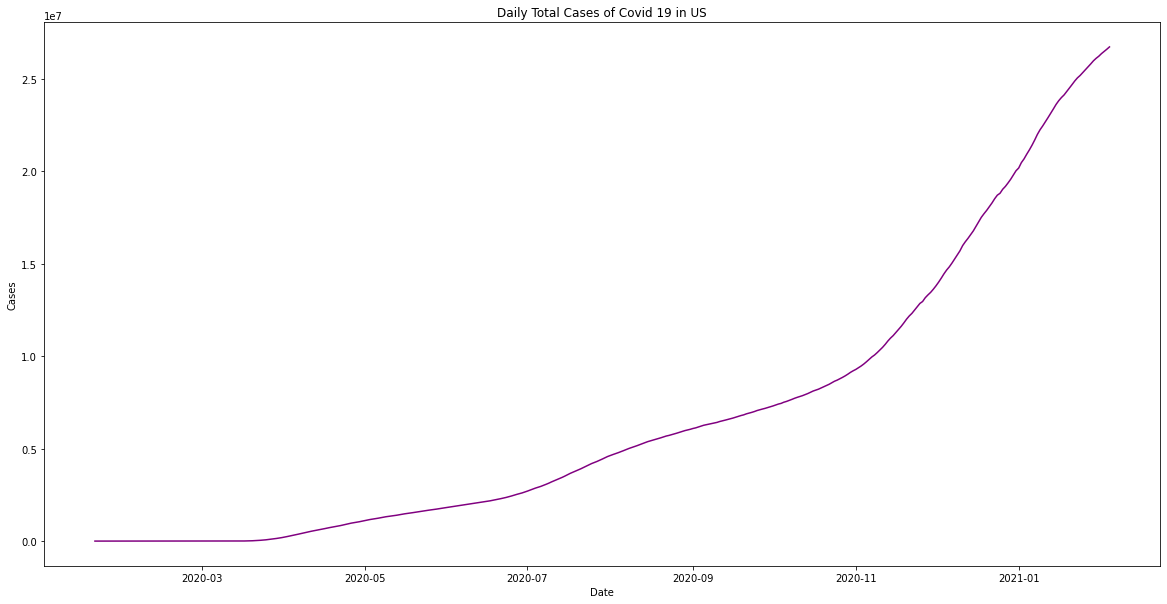

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))
# x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in total_cases['date']]
# dates = matplotlib.dates.date2num(total_cases['date'])
# matplotlib.pyplot.plot_date(dates, values)
# Add x-axis and y-axis
ax.plot(total_us_cases['date'],
        total_us_cases['cases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Daily Total Cases of Covid 19 in US")

plt.show()


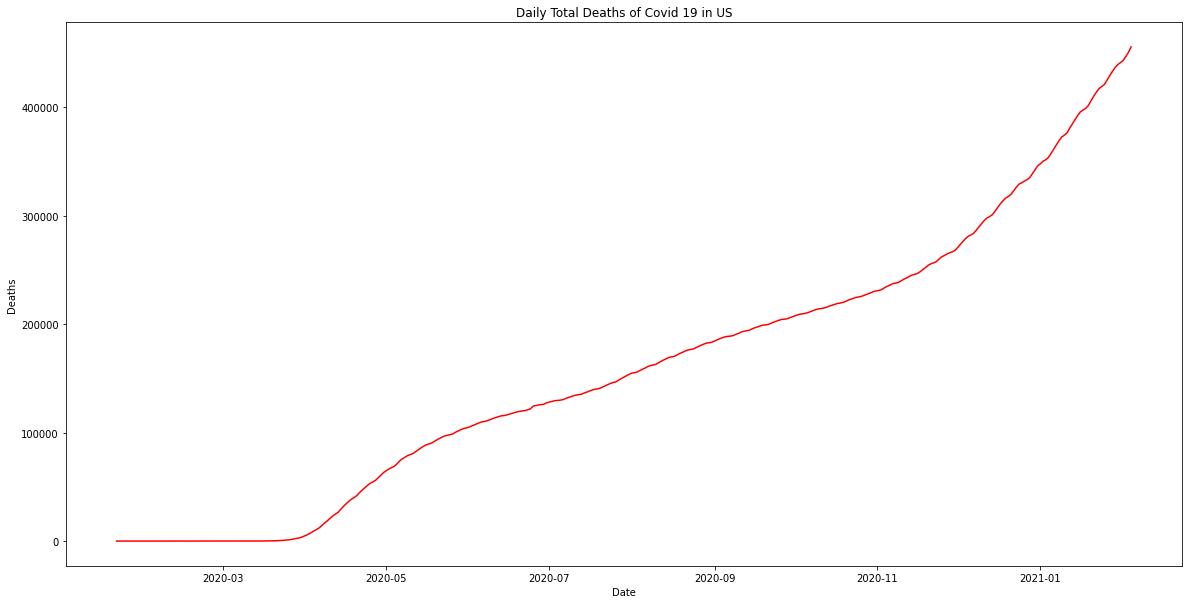

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in total_cases['date']]
# dates = matplotlib.dates.date2num(total_cases['date'])
# matplotlib.pyplot.plot_date(dates, values)
# Add x-axis and y-axis

ax.plot(total_us_deaths['date'],
        total_us_deaths['deaths'],
        color='red')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="Daily Total Deaths of Covid 19 in US")

plt.show()

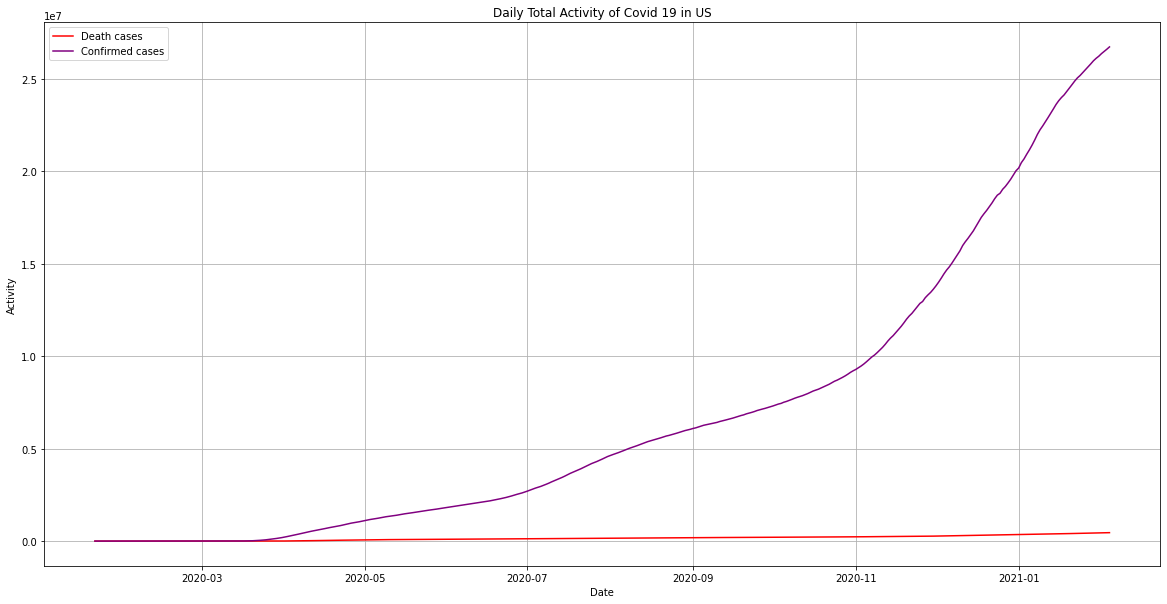

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
# x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in total_cases['date']]
# dates = matplotlib.dates.date2num(total_cases['date'])
# matplotlib.pyplot.plot_date(dates, values)
# Add x-axis and y-axis

ax.plot(total_us_deaths['date'],
        total_us_deaths['deaths'],
        color='red',
        label = "Death cases")

ax.plot(total_us_cases['date'],
        total_us_cases['cases'],
        color='purple',
        label = "Confirmed cases")


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Activity",
       title="Daily Total Activity of Covid 19 in US")

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
total_county_state = df_cld[['county','state','cases','deaths']].groupby(['county','state']).sum()

In [ ]:
total_county_state.sort_values(by=['cases', 'deaths'], ascending=False, inplace=True)
total_county_state.reset_index(inplace=True)
total_county_state.head()

,county,state,cases,deaths
0,Los Angeles,California,94861901,1821109.0
1,New York City,New York,84710461,6889874.0
2,Cook,Illinois,54491615,1583260.0
3,Miami-Dade,Florida,45062269,741800.0
4,Maricopa,Arizona,44756677,835389.0


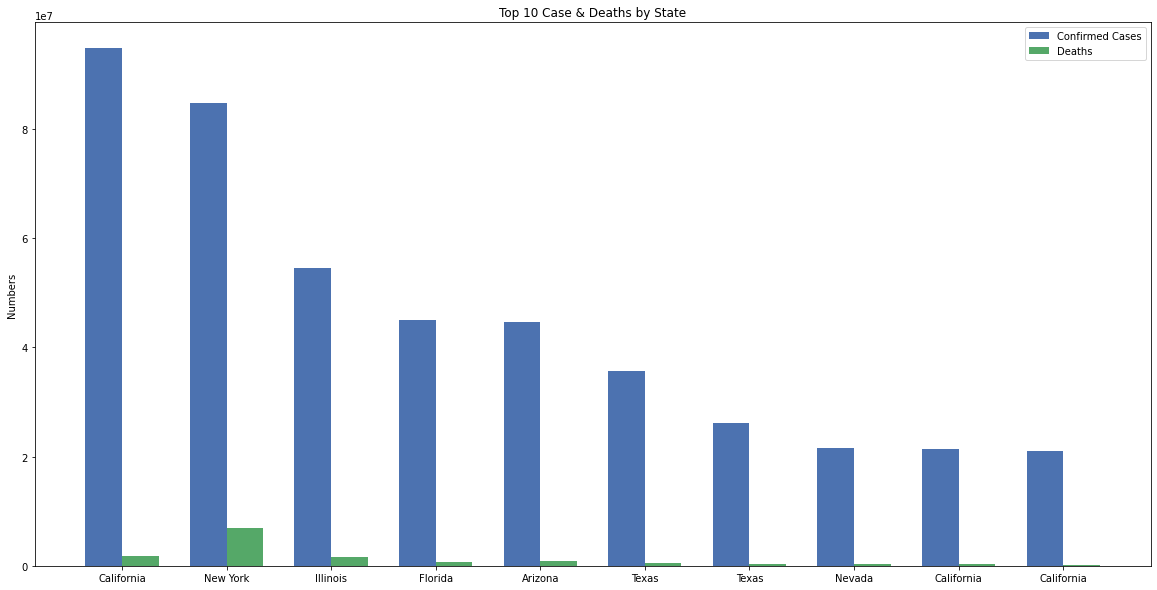

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

width= 0.35
labels = total_county_state.state.head(10)
x = np.arange(len(labels))
ax.bar(x - width/2, total_county_state.cases.head(10), width, label='Confirmed Cases')
ax.bar(x + width/2, total_county_state.deaths.head(10), width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Top 10 Case & Deaths by State')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [ ]:
total_us_cases.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


##Average COVID-19 Cases of Each State in Year 2020

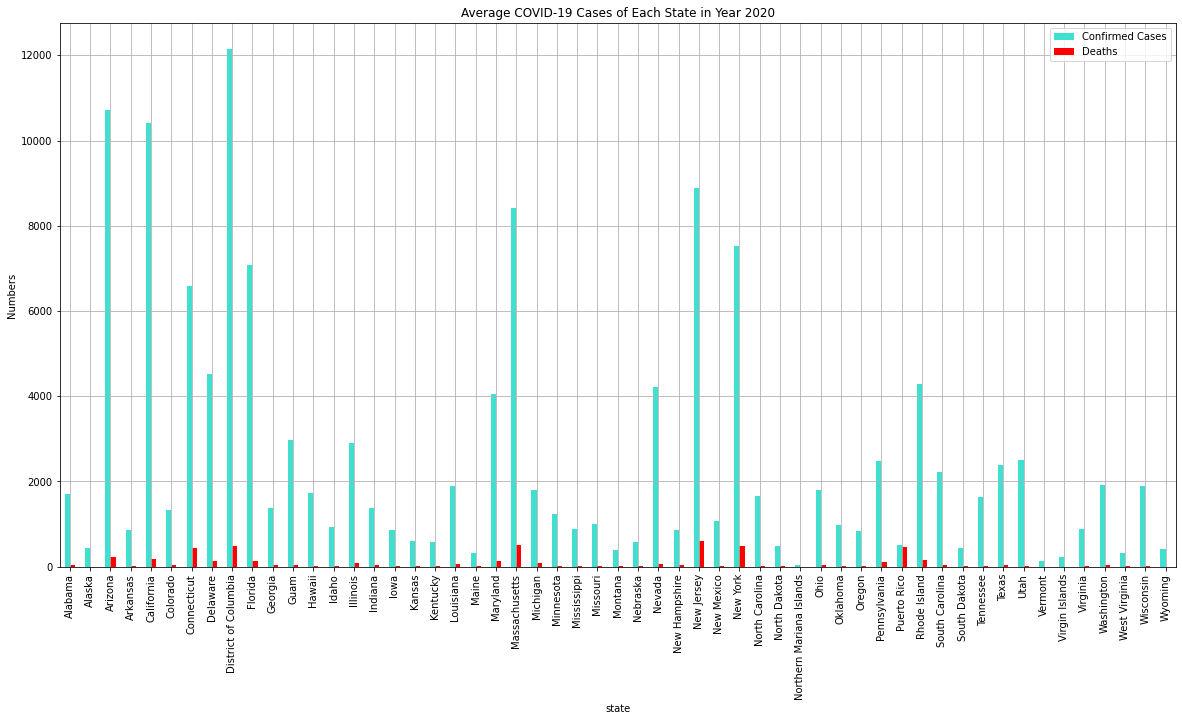

In [ ]:
#average cases of each state in Year 2020
#Group by State

matplotlib.style.use('seaborn-deep')

year = (df_cld['date'] >= '2020-1-1') & (df_cld['date'] <= '2020-12-31')
avg_state = df_cld[year].groupby('state').mean()

avg_state.sort_values('state',ascending=True).plot(kind='bar', title="Average COVID-19 Cases of Each State in Year 2020",ylabel=('Numbers'),figsize=(20,10),color=('turquoise','red'))
plt.grid(True)
plt.legend(['Confirmed Cases','Deaths'])
plt.show()

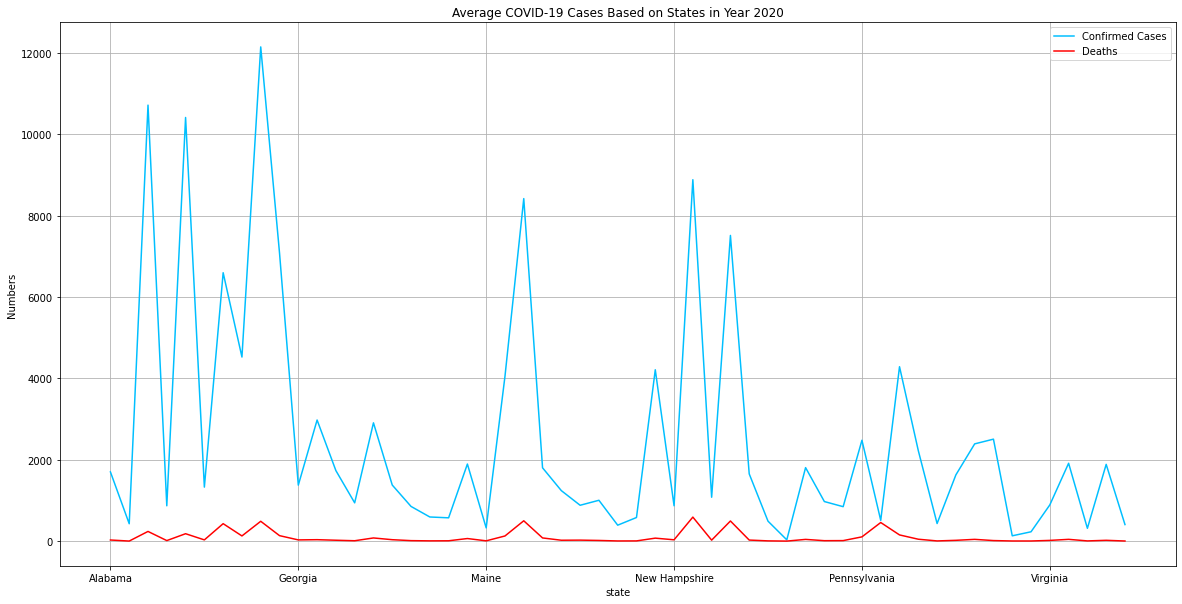

In [ ]:
#average cases of each state in Year 2020
#Group by State
matplotlib.style.use('seaborn-deep')

year = (df_cld['date'] >= '2020-1-1') & (df_cld['date'] <= '2020-12-31')
avg_state = df_cld[year].groupby('state').mean()

avg_state.sort_values('state',ascending=True).plot(title="Average COVID-19 Cases Based on States in Year 2020",ylabel=('Numbers'),figsize=(20,10),color=('deepskyblue','red'))
plt.grid(True)
plt.legend(['Confirmed Cases','Deaths'])
plt.show()

## Correlation


In [ ]:
df_cld.describe()

,cases,deaths
count,9.984090e+05,976918.000000
mean,2.567480e+03,61.853465
std,1.369838e+04,476.314798
min,0.000000e+00,0.000000
25%,4.700000e+01,1.000000
50%,3.110000e+02,5.000000
75%,1.332000e+03,28.000000
max,1.134820e+06,27428.000000


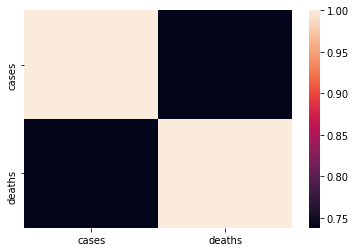

In [ ]:
sns.heatmap(df_cld.corr())

## **Prediction**

1.   Store the confirmed cases in US in a list
2.   Count the days and store in list 
3.   Count the deaths and store in list 







In [ ]:
US_cases = np.array(total_us_cases.cases)
US_deaths = np.array(total_us_deaths.deaths).reshape(-1,1)
US_states = np.array(total_county_state.state).tolist()
days_since_1_21 = np.array([i for i in range(len(total_us_cases.date))]).reshape(-1,1)
dates = (df_cld.date.unique()).reshape(-1,1)

In [ ]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(days_since_1_21) + days_in_future)]).reshape(-1,1)

In [ ]:
start_date = datetime.datetime.strptime('1/21/2020', '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
df_train = pd.DataFrame({"Dates":future_forecast_dates[:-10], "Cases": US_cases})
df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_train['Dates']=df_train['Dates'].map(datetime.datetime.toordinal)

In [ ]:
df_train.head()

,Dates,Cases
0,737445,1
1,737446,1
2,737447,1
3,737448,2
4,737449,3


In [ ]:
 from sklearn.utils import shuffle
 from sklearn.linear_model import LinearRegression
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(df_train['Dates'].values.reshape(-1,1), df_train['Cases'].values.reshape(-1,1), test_size=0.30, random_state=0)
 model = LinearRegression() #create linear regression object
 model.fit(X_train, y_train) #train model on   train data
 model.score(X_train, y_train) #check score

0.8253063158848017

#### Predict the cases for the next ten days

In [ ]:
future_ten_days = [datetime.datetime.strptime(date, '%m/%d/%Y').date() for date in future_forecast_dates[-10:]]
future_ten_days = np.array([datetime.datetime.toordinal(date) for date in future_ten_days]).reshape(-1,1)
yhat_predict = model.predict(future_ten_days)
# model.predict(np.array(future_ten_days).reshape(-1,1))

In [ ]:
type(yhat_predict)
yhat_predict.reshape(1,-1).tolist()[0]

[18658804.020469666,
 18721219.85472107,
 18783635.688964844,
 18846051.523216248,
 18908467.35746765,
 18970883.191719055,
 19033299.02596283,
 19095714.860214233,
 19158130.694465637,
 19220546.52870941]

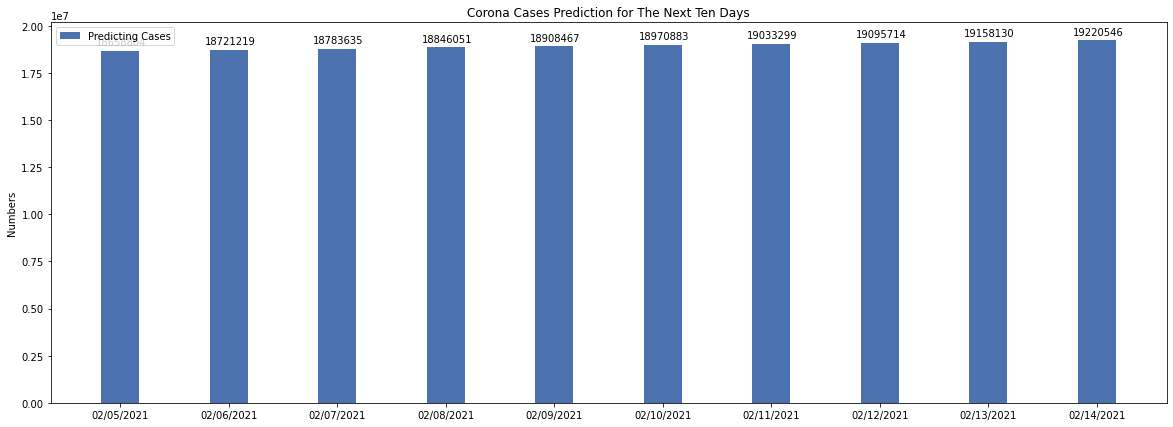

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
width= 0.35
labels = future_forecast_dates[-10:]
x = np.arange(len(labels))
ax.bar(x - width/2, yhat_predict.reshape(1,-1).tolist()[0], width, label='Predicting Cases')

for i, v in enumerate(yhat_predict):
    plt.text(x[i]- 0.4, v + 300000, str(int(v)))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Numbers')
ax.set_title('Corona Cases Prediction for The Next Ten Days')
ax.set_xticks(x- width/2)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [ ]:
import pickle

with open('model.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('model.pkl', 'rb') as handle:
    loadedModel = pickle.load(handle)  
loadedModel.predict(future_ten_days)

array([[18658804.02046967],
       [18721219.85472107],
       [18783635.68896484],
       [18846051.52321625],
       [18908467.35746765],
       [18970883.19171906],
       [19033299.02596283],
       [19095714.86021423],
       [19158130.69446564],
       [19220546.52870941]])

# World Covid Case

Format:

iso_code /continent /location /date 

/total_cases /new_cases /new_cases_smoothed 

/total_deaths	/new_deaths	/new_deaths_smoothed	

/total_cases_per_million /new_cases_per_million 
/new_cases_smoothed_per_million	

/total_deaths_per_million	/new_deaths_per_million	/new_deaths_smoothed_per_million

/reproduction_rate	

/icu_patients	/icu_patients_per_million	

/hosp_patients	/hosp_patients_per_million

/weekly_icu_admissions	/weekly_icu_admissions_per_million	

/weekly_hosp_admissions /weekly_hosp_admissions_per_million	

/new_tests	total_tests	/total_tests_per_thousand	/new_tests_per_thousand	/new_tests_smoothed	/new_tests_smoothed_per_thousand	/positive_rate	/tests_per_case	/tests_units	/total_vaccinations	/people_vaccinated	/people_fully_vaccinated	/new_vaccinations	/new_vaccinations_smoothed	/total_vaccinations_per_hundred	/people_vaccinated_per_hundred	/people_fully_vaccinated_per_hundred	/new_vaccinations_smoothed_per_million

/stringency_index	/population	/population_density	/median_age	/aged_65_older	/aged_70_older	/gdp_per_capita	/extreme_poverty	/cardiovasc_death_rate	/diabetes_prevalence	/female_smokers	/male_smokers	/handwashing_facilities	/hospital_beds_per_thousand	/life_expectancy	/human_development_index

In [ ]:
df_wcc.shape

(35898, 59)

In [ ]:
df_wcc.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##Data Cleaning
1. check for null
2. check for duplicates
3. check for outliers
4. check for structural errors

In [ ]:
# to check whether ALL values are null in series of column
df_wcc.isnull().all()

iso_code                                 False
continent                                False
location                                 False
date                                     False
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [ ]:
df_wcc.isnull().sum()

iso_code                                  1860
continent                                 1860
location                                     0
date                                         0
total_cases                                353
new_cases                                  352
new_cases_smoothed                         881
total_deaths                              4269
new_deaths                                4200
new_deaths_smoothed                        881
total_cases_per_million                   2210
new_cases_per_million                     2212
new_cases_smoothed_per_million            2712
total_deaths_per_million                  6046
new_deaths_per_million                    6047
new_deaths_smoothed_per_million           2712
reproduction_rate                         8275
icu_patients                             31116
icu_patients_per_million                 31116
hosp_patients                            30236
hosp_patients_per_million                30236
weekly_icu_ad

In [ ]:
#check whether there are any duplicate rows
df_wcc.duplicated().value_counts()

False    35898
dtype: int64